In [1]:
import numpy as np
import pandas as pd
import json
import codecs
import datetime

In [2]:
import sys

In [3]:
sys.path.append('.')

In [5]:
import vector_creator.score_vectors_assembly as svec

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [8]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,9), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [9]:
path = '/Users/smuel/AndroidStudioProjects/LuckyMeIntgratedSDK/metadata_init_phase/'

In [10]:
lst = svec.file_list_with_unique_id(path, [])

In [12]:
lst

{'unique_ids': array(['05fa68e5-0ba3-4783-9c07-42740c4914c6',
        '236b91d2-cefb-405a-9de5-a3673ef1c736',
        '5d8a3562-60bf-4186-9d35-a4bb86c4d329',
        'c615dcc5-243e-4fde-8737-917e7ec29329'], dtype='<U36'),
 'file_list': ['05fa68e5-0ba3-4783-9c07-42740c4914c6_11-06-2021_09-53-01.json',
  '236b91d2-cefb-405a-9de5-a3673ef1c736_30-06-2021_01-17-49.json',
  '5d8a3562-60bf-4186-9d35-a4bb86c4d329_28-06-2021_11-14-45.json',
  'c615dcc5-243e-4fde-8737-917e7ec29329_27-06-2021_12-47-52.json']}

In [13]:
uid = lst.get('unique_ids')[0]
meta_files = lst.get('file_list')

In [14]:
uid

'05fa68e5-0ba3-4783-9c07-42740c4914c6'

CONVERT JSON METADATA BY UNIQUE_UID TO:  
1. Dict. OF DataFrames BY KEY FIELD {CallLogs, ImgMetaData, InstallApps} 
2. CONFIGURATION OF SAMPLING RATED AND LIFE CYCLE 
3. TUPLE OF GPS (LAT, LONG) IF EXISTS

In [15]:
config_dict, loc_dict, df_dict = svec.df_for_init_meta(uid, path, lst['file_list'])

In [16]:
config_dict

{'LifeCycleInDays': '1',
 'WifiGpsBatterySamplingTime': '90000',
 'ScreenSensorTime': '45000',
 'ActiveAppSamplingTime': '30000'}

In [17]:
loc_dict[0]

{'Latitude': 32.0875366,
 'Longitude': 34.7854512,
 'Sampling_Collect_Time': '09:53:01'}

In [19]:
df_dict.keys()

dict_keys(['05fa68e5-0ba3-4783-9c07-42740c4914c6_CallLogs', '05fa68e5-0ba3-4783-9c07-42740c4914c6_ImgMetaData', '05fa68e5-0ba3-4783-9c07-42740c4914c6_InstallApps'])

EXTRACT BY UNIQUE_UID: 
1. Extract call-logs DataFrame qiven by unique_uid
2. '05fa68e5-0ba3-4783-9c07-42740c4914c6_CallLogs' is Dict key in the format : UNIQUE-ID_FEILD-TYPE
3. the Dict Value for this key is the corresponding data frame 

In [20]:
dg = df_dict['05fa68e5-0ba3-4783-9c07-42740c4914c6_ImgMetaData']

In [21]:
dg.head(10)

,IMAGE_TYPE,IMAGE_DATE_TIME
0,jpeg,2019-10-16 08:48:55
1,jpeg,2019-10-16 08:49:06
2,jpeg,2019-10-16 08:49:07
3,jpeg,2019-10-20 15:42:48
4,jpeg,2019-10-22 14:09:27
5,jpeg,2019-10-22 14:09:28
6,jpeg,2019-10-26 08:51:39
7,jpeg,2019-10-28 09:00:37
8,jpeg,2019-10-28 09:00:38
9,jpeg,2019-10-28 09:00:39


In [22]:
df = df_dict['05fa68e5-0ba3-4783-9c07-42740c4914c6_CallLogs']

In [23]:
df.head(10)

,CALL_NUMBER,CALL_DATE_TIME,CALL_TYPE,CALL_DURATION
0,588957574B738DBFD1C851F3F2FE248C1D20A20C,2020-07-12 15:33:27.936999936,INCOMING,42
1,588957574B738DBFD1C851F3F2FE248C1D20A20C,2020-07-13 06:22:11.676000000,INCOMING,43
2,588957574B738DBFD1C851F3F2FE248C1D20A20C,2020-07-13 09:59:22.920000000,NaN,0
3,588957574B738DBFD1C851F3F2FE248C1D20A20C,2020-07-13 09:59:38.879000064,OUTGOING,0
4,AE183B922FA98F156CF973AAED3FA7C194D3BA37,2020-07-13 10:33:59.004000000,MISSED,0
5,588957574B738DBFD1C851F3F2FE248C1D20A20C,2020-07-13 10:53:22.911000064,OUTGOING,63
6,C815DA5C8A969A183FF1E39B0DD11A5A72E7CD6F,2020-07-13 11:27:29.232000000,MISSED,0
7,AE183B922FA98F156CF973AAED3FA7C194D3BA37,2020-07-13 11:28:08.684999936,OUTGOING,0
8,27E6A4EB885A8569046B05ADC7613825F594B9E7,2020-07-13 11:28:56.890000128,OUTGOING,215
9,6E9F955A387A55273ED5779804D63ACA2D9E0D16,2020-07-13 11:29:24.489000192,MISSED,0


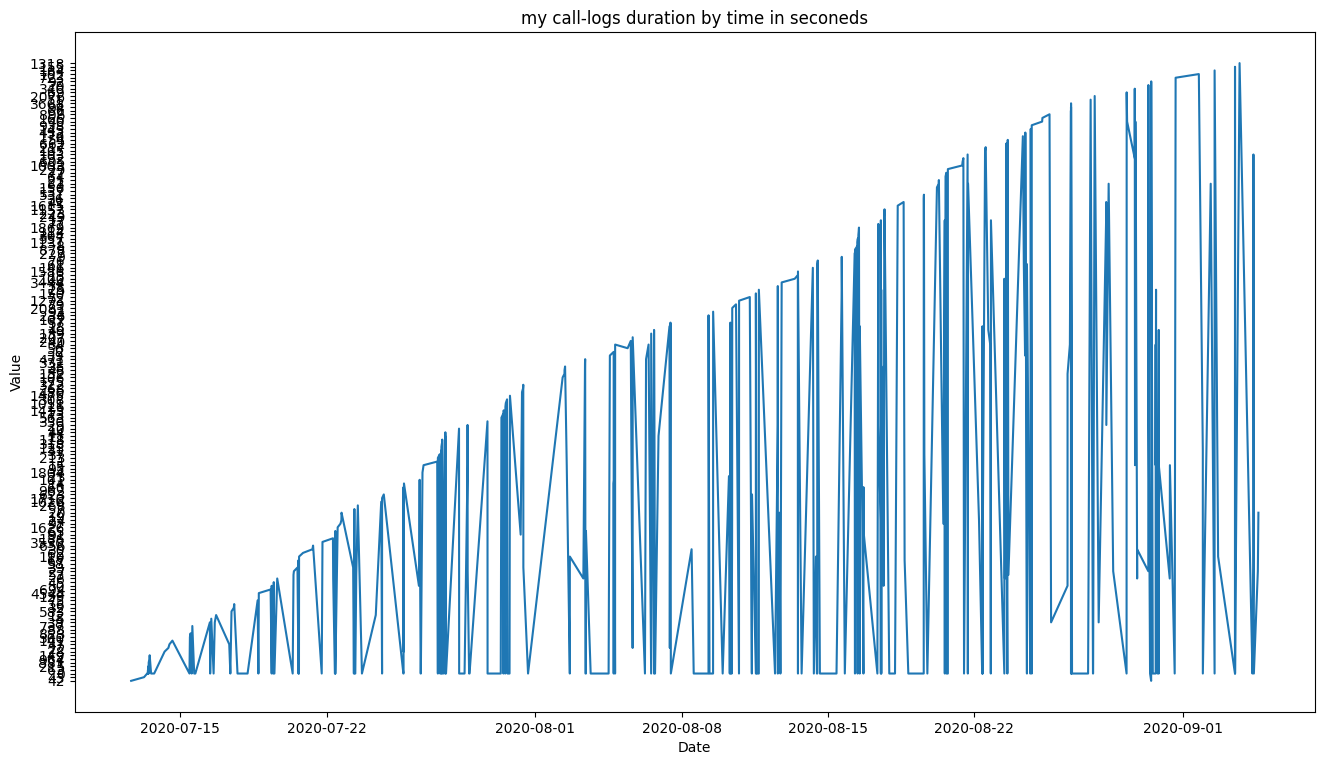

In [21]:
plot_df(df, x=df.CALL_DATE_TIME, y=df.CALL_DURATION, title="my call-logs duration by time in seconeds")

In [24]:
df0 = df.groupby(pd.Grouper(key='CALL_DATE_TIME', freq='D')).agg({'CALL_NUMBER' : ['count']})

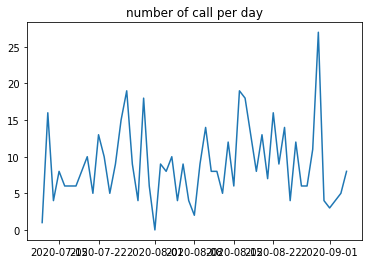

In [25]:
plt.plot(df0)
plt.title('number of call per day')
plt.show()

In [26]:
df1 = df.groupby(pd.Grouper(key='CALL_DATE_TIME', freq='D')).agg({'CALL_NUMBER' : ['nunique']})

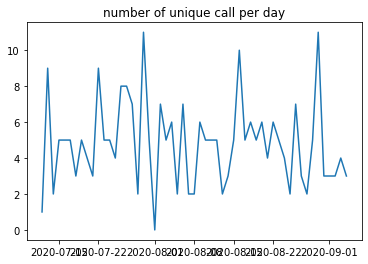

In [27]:
plt.plot(df1)
plt.title('number of unique call per day')
plt.show()

In [28]:
df2 = df.groupby(pd.Grouper(key='CALL_DATE_TIME', freq='D')).apply(lambda x : x.pivot_table(index=['CALL_NUMBER'], aggfunc='size'))
df3 = df2.groupby(level=0).agg(np.mean)

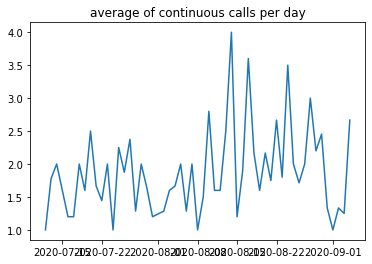

In [29]:
plt.plot(df3)
plt.title('average of continuous calls per day')
plt.show()

In [30]:
df4 = df.set_index('CALL_DATE_TIME')
df4 = df4.between_time('20:00:00', '08:00:00')
df5 = df4.groupby(pd.Grouper(freq='D')).agg({'CALL_NUMBER': ['count']})

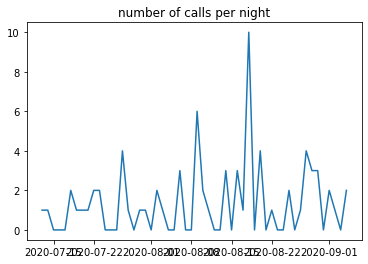

In [31]:
plt.plot(df5)
plt.title('number of calls per night')
plt.show()

In [32]:
lat = loc_dict[0]['Latitude']
long = loc_dict[0]['Longitude']

In [33]:
long_lat_tuple = (lat, long)

In [34]:
long_lat_tuple

(32.0875366, 34.7854512)

In [35]:
from vector_creator.preprocess import utils

In [36]:
df6 = utils.create_column_day_of_week(df, datetime_col='CALL_DATE_TIME', col_name='day_of_week')
df7 = utils.filter_by_weekends(df6, long_lat_tuple, 'day_of_week')
df8 = df7.groupby(pd.Grouper(key='CALL_DATE_TIME', freq='D')).agg({'CALL_NUMBER' : ['count']})

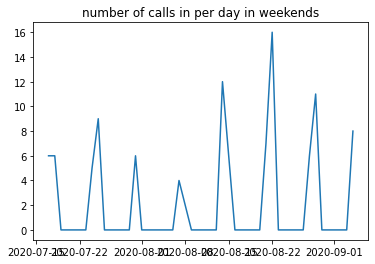

In [37]:
plt.plot(df8)
plt.title('number of calls in per day in weekends')
plt.show()

In [38]:
df9 = dg.groupby(pd.Grouper(key='IMAGE_DATE_TIME', freq='D')).agg({'IMAGE_TYPE': ['count']})

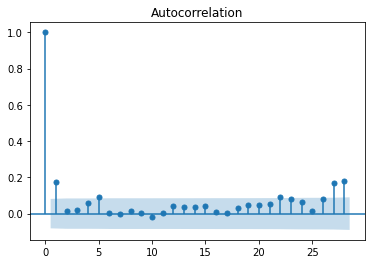

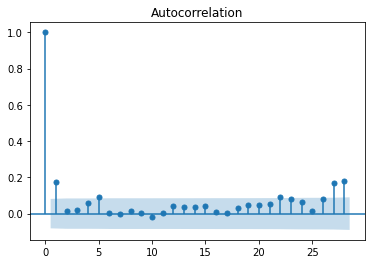

In [39]:
plot_acf(df9.IMAGE_TYPE)

In [40]:
vec1 = svec.create_call_logs_vector_for_unique_id(uid, df, (lat, long))

In [41]:
vec1.tail(15)

62    4.153856
63    6.634087
64    6.767921
65    1.000000
66    7.059615
67    4.804478
68    8.514697
69    0.049796
70    0.026997
71    0.028692
72    0.028013
73    0.083387
74    0.047296
75    0.047108
76    0.042353
Name: 05fa68e5-0ba3-4783-9c07-42740c4914c6, dtype: float64

In [42]:
vec1.size

77

In [43]:
vec2 = svec.create_photo_gallery_vector_for_unique_id(uid, dg, (lat, long))

In [44]:
vec2.tail(15)

27    0.290098
28    0.000000
29    0.000000
30    1.000000
31    0.925484
32    0.872492
33    0.820717
34    0.806853
35    0.229739
36    0.030061
37    0.022357
38    0.001024
39    0.000604
40    0.001717
41    0.001334
Name: 05fa68e5-0ba3-4783-9c07-42740c4914c6, dtype: float64

In [45]:
vec2.size

42

In [46]:
vec = vec1.append(vec2)

In [47]:
vec.size

119

In [48]:
vec.name

'05fa68e5-0ba3-4783-9c07-42740c4914c6'

In [49]:
type(vec2)

pandas.core.series.Series